In [1]:
 print("Basic random forest")

Basic random forest


In [2]:
#import necessary library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [3]:
#breast cancer build in data set 

data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target,name='target')

x.shape

(569, 30)

In [4]:
y.shape

(569,)

In [5]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
x_train.shape

(426, 30)

In [7]:
x_test.shape

(143, 30)

In [8]:
#base line random forest
rf_baseline=RandomForestClassifier(
    n_estimators=100,#ata koto nibo ta decide korte hobe cross validation kore 
    #totall number of tree that declair 
    random_state=42
)
rf_baseline.fit(x_train,y_train)
y_pred=rf_baseline.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
#model score 
accuracy_score(y_test,y_pred)

0.958041958041958

In [10]:
#see clasification report 
classification_report(y_test,y_pred,target_names=data.target_names)

'              precision    recall  f1-score   support\n\n   malignant       0.96      0.92      0.94        53\n      benign       0.96      0.98      0.97        90\n\n    accuracy                           0.96       143\n   macro avg       0.96      0.95      0.95       143\nweighted avg       0.96      0.96      0.96       143\n'

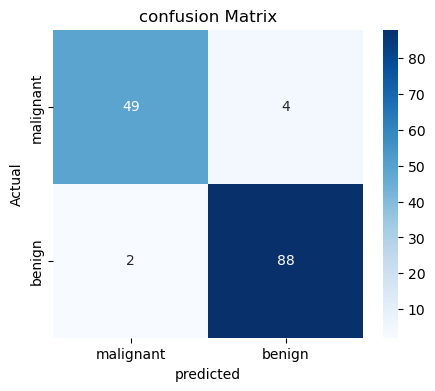

In [11]:
#confision matrix 
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel('predicted')
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.show()

Feature important 

In [ ]:
#feature important which feature is important that we take and learn 
importance=pd.Series(
    rf_baseline.feature_importances_,#this is a build in function
    index=x.columns
).sort_values(ascending=False)

importance.head(10)

worst area              0.149674
worst concave points    0.127189
mean concave points     0.104650
worst radius            0.086963
worst perimeter         0.080299
mean perimeter          0.080037
mean concavity          0.055420
mean radius             0.053665
mean area               0.044062
area error              0.024557
dtype: float64

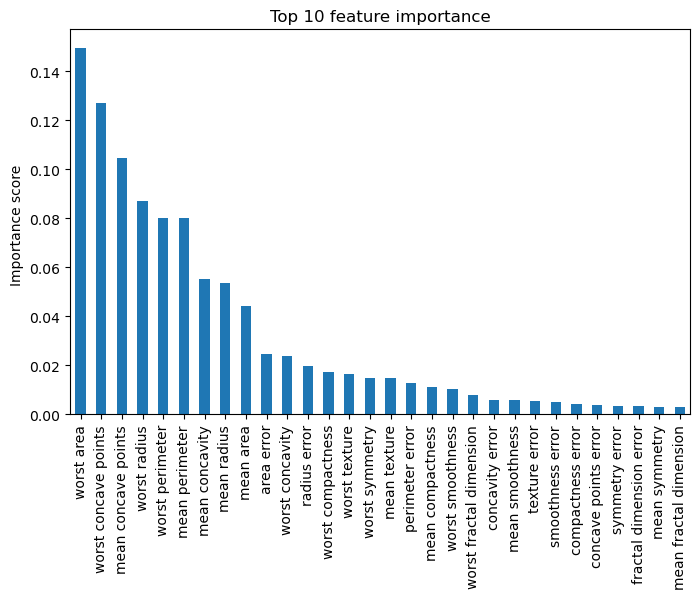

In [15]:
#visulisation the overall  important feature
plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Top 10 feature importance")
plt.ylabel("Importance score ")
plt.show()

HYPER PARAMETER TUNING MATTERS

*KEY HYPER PARAMETER

N_ESTIMATORS NUMBER OF TREE

MAX_DEPTH : TREE DEPTH

MIN_SAMPLE_SPLIT : MINIMUM SAMPLES TO SPLIT

MAX_FEATURE : FEATURE PER SPLIT

In [22]:
#KEY HYPERPARAMETERS 
param_grid={
    "n_estimators":[100,150,175,200],
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,3,5],
    "max_features":['sqrt','log2']
}

In [23]:
#GridsearchCV for Tuning

grid_rf=GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,#cv mane overall data set ke 5 vhage vhag korbe then 4 vhag traing a and 1 bhag testing
    #cross validation
    scoring="f1",#class imbalance thakleo f1 ar maddhome amra accurate tai pabo
    n_jobs=-1#aro lengthi value hobe cpu score komay 


)

grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 175, 200]},
             scoring='f1')

In [24]:
#show output
print(":Best parameters")
print(grid_rf.best_params_)

:Best parameters
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}


In [25]:
#usings this best feature the tuned model

best_rf=grid_rf.best_estimator_
y_pred_best=best_rf.predict(x_test)

In [26]:
print(classification_report(y_test,y_pred_best,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

